#### MNIST Database - CNN

In [2]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step 


In [4]:
import matplotlib.image as image
import matplotlib.pyplot as plt

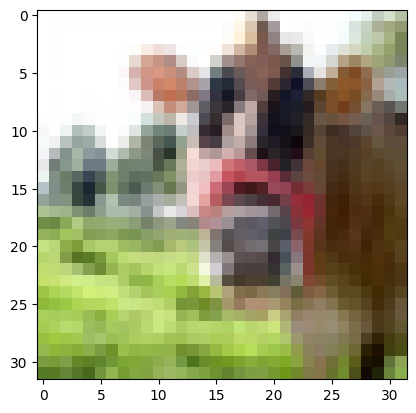

In [6]:
y_train[0]
plt.imshow(x_train[0]) #no need to use cmap='gray' since cifar100 data is in RGB

#Reshape the data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#Encode the target labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train,  batch_size=32, epochs=10)

Epoch 1/10


C:\Users\Lindiway\anaconda3\Lib\site-packages\keras\src\ops\nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\Lindiway\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 45ms/step - accuracy: 0.0096 - loss: 0.0000e+00 
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.0098 - loss: 0.0000e+00 
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.0094 - loss: 0.0000e+00 
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0101 - loss: nan        
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.0099 - loss: nan 
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0101 - loss: nan
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 42ms/step - accuracy: 0.0101 - loss: nan
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0096 - loss: nan
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.0104 - loss: nan
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0088 - loss: nan 


In [17]:
#Test the accuracy of the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0109 - loss: nan

Test Accuracy: 1.00%
